#### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Importing the dataset from Kaggle

In [2]:
data = pd.read_csv('steam_games.csv')
print(data.shape)
data

(40833, 20)


,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40828,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,NaN,NaN,"Feb 12, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...",NaN,"Casual,Simulation","About This Content Play ""Ghost Division"" by S...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7,

#### Dropping the columns original price and discount price to replace them by the actual updated scraped prices info

In [3]:
data = data.drop(['original_price','discount_price'], axis=1)

In [4]:
data

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers..."
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o..."
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o..."
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,..."
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40828,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,NaN,NaN,"Feb 12, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...",NaN,"Casual,Simulation","About This Content Play ""Ghost Division"" by S...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7, Win..."
40829,https://store.steampowered.com/app/899832/Rock...,app,Rocksmith® 2014 Edition –

#### Importing the previously scraped data

In [5]:
data_scraped = pd.read_csv('gamesprices2.csv')
print(data_scraped.shape)
data_scraped

(136370, 3)


,title,price,discprice
0,Counter-Strike: Global Offensive,Free to Play,Free to Play
1,Dead Space,"59,99",NaN
2,PUBG: BATTLEGROUNDS,Free to Play,Free to Play
3,Red Dead Redemption 2,"59,99","19,79"
4,EA SPORTS™ FIFA 23,"69,99","27,99"
...,...,...,...
136365,ARK 2,NaN,NaN
136366,ENA: Dream BBQ,Free,Free
136367,SteamWorld Build,NaN,NaN
136368,Stellaris: First Contact Story Pack,NaN,NaN


#### Changing the colunm name to merge

In [6]:
data_scraped = data_scraped.rename(columns={'title': 'name'})

In [7]:
data_scraped

,name,price,discprice
0,Counter-Strike: Global Offensive,Free to Play,Free to Play
1,Dead Space,"59,99",NaN
2,PUBG: BATTLEGROUNDS,Free to Play,Free to Play
3,Red Dead Redemption 2,"59,99","19,79"
4,EA SPORTS™ FIFA 23,"69,99","27,99"
...,...,...,...
136365,ARK 2,NaN,NaN
136366,ENA: Dream BBQ,Free,Free
136367,SteamWorld Build,NaN,NaN
136368,Stellaris: First Contact Story Pack,NaN,NaN


#### Merging both datasets based on the title name of games column. 

In [8]:
data_merged = pd.merge(data, data_scraped, on='name')
print(data_merged.shape)
data_merged

(35108, 20)


,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,price,discprice
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...","19,99",NaN
1,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...","39,99",NaN
2,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...","39,99","23,99"
3,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free To Play,Free To Play
4,https://store.steampowered.com/app/601150/Devi...,app,Devil May Cry 5,"The ultimate Devil Hunter is back in style, in...","Very Positive,(408),- 87% of the 408 user revi...","Very Positive,(9,645),- 92% of the 9,645 user ...","Mar 7, 2019","CAPCOM Co., Ltd.","CAPCOM Co., Ltd.,CAPCOM Co., Ltd.","Action,Hack and Slash,Great Soundtrack,Demons,...","Single-player,Online Multi-Player,Online Co-op...","English,French,Italian,German,Spanish - Spain,...",51.0,Action,About This Game The Devil you know returns in...,Mature Content Description The developers de...,"Minimum:,OS:,WINDOWS® 7, 8.1, 10 (64-BIT Requi...","Recommended:,OS:,WINDOWS® 7, 8.1, 10 (64-BIT R...","29,99","9,89"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35103,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,NaN,NaN,"Feb 12, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...",NaN,"Casual,Simulation","About This Content Play ""Ghost Division"" by S...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7, Win...","2,99",NaN
35

#### Although they seem to be already sneak case formatted, applying standards. 

In [9]:
def standardize_header(dataframe):
    dataframe.columns = [c.lower().replace(' ', '_') for c in dataframe.columns]

standardize_header(data_merged)

In [10]:
data_merged

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,price,discprice
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...","19,99",NaN
1,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...","39,99",NaN
2,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...","39,99","23,99"
3,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free To Play,Free To Play
4,https://store.steampowered.com/app/601150/Devi...,app,Devil May Cry 5,"The ultimate Devil Hunter is back in style, in...","Very Positive,(408),- 87% of the 408 user revi...","Very Positive,(9,645),- 92% of the 9,645 user ...","Mar 7, 2019","CAPCOM Co., Ltd.","CAPCOM Co., Ltd.,CAPCOM Co., Ltd.","Action,Hack and Slash,Great Soundtrack,Demons,...","Single-player,Online Multi-Player,Online Co-op...","English,French,Italian,German,Spanish - Spain,...",51.0,Action,About This Game The Devil you know returns in...,Mature Content Description The developers de...,"Minimum:,OS:,WINDOWS® 7, 8.1, 10 (64-BIT Requi...","Recommended:,OS:,WINDOWS® 7, 8.1, 10 (64-BIT R...","29,99","9,89"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35103,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,NaN,NaN,"Feb 12, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...",NaN,"Casual,Simulation","About This Content Play ""Ghost Division"" by S...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7, Win...","2,99",NaN
35

#### Displaying Data Info

In [11]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35108 entries, 0 to 35107
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   url                       35108 non-null  object 
 1   types                     35072 non-null  object 
 2   name                      34820 non-null  object 
 3   desc_snippet              23593 non-null  object 
 4   recent_reviews            2323 non-null   object 
 5   all_reviews               24842 non-null  object 
 6   release_date              32570 non-null  object 
 7   developer                 34639 non-null  object 
 8   publisher                 30497 non-null  object 
 9   popular_tags              32743 non-null  object 
 10  game_details              34628 non-null  object 
 11  languages                 34873 non-null  object 
 12  achievements              10900 non-null  float64
 13  genre                     34644 non-null  object 
 14  game_d

#### Checking for duplicates 

In [12]:
data_merged.duplicated().sum()

2992

#### Dropping Duplicates

In [13]:
data_merged.drop_duplicates(keep='first', inplace=True)
display(data_merged.shape)
data_merged.duplicated().sum()

(32116, 20)

0

#### Checking Nan Values 

In [14]:
data_merged.isna().sum()

url                             0
types                           8
name                           64
desc_snippet                10325
recent_reviews              29853
all_reviews                  8606
release_date                 1876
developer                     212
publisher                    3891
popular_tags                 1748
game_details                  286
languages                      64
achievements                21601
genre                         215
game_description             1701
mature_content              29934
minimum_requirements        15283
recommended_requirements    15276
price                         802
discprice                   26907
dtype: int64

In [15]:
data_merged.isna().sum()/len(data_merged)

url                         0.000000
types                       0.000249
name                        0.001993
desc_snippet                0.321491
recent_reviews              0.929537
all_reviews                 0.267966
release_date                0.058413
developer                   0.006601
publisher                   0.121155
popular_tags                0.054428
game_details                0.008905
languages                   0.001993
achievements                0.672593
genre                       0.006694
game_description            0.052964
mature_content              0.932059
minimum_requirements        0.475869
recommended_requirements    0.475651
price                       0.024972
discprice                   0.837807
dtype: float64

In [16]:
nulls_percent_df = pd.DataFrame(data_merged.isna().sum()/len(data_merged)).reset_index()
nulls_percent_df
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,url,0.000000
1,types,0.000249
2,name,0.001993
3,desc_snippet,0.321491
4,recent_reviews,0.929537
5,all_reviews,0.267966
6,release_date,0.058413
7,developer,0.006601
8,publisher,0.121155
9,popular_tags,0.054428


In [17]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0]

,column_name,nulls_percentage
1,types,0.000249
2,name,0.001993
3,desc_snippet,0.321491
4,recent_reviews,0.929537
5,all_reviews,0.267966
6,release_date,0.058413
7,developer,0.006601
8,publisher,0.121155
9,popular_tags,0.054428
10,game_details,0.008905


In [18]:
nan_percentage = data_merged.isna().mean().mean() * 100
print(f"Percentage of missing values: {nan_percentage:.2f}%")

Percentage of missing values: 26.26%


#### Dealing with Nan Values

##### Checking the column type

In [19]:
data_merged['types'].unique()

array(['app', 'bundle', 'sub', nan], dtype=object)

In [20]:
data_merged['types'].value_counts()

app       30500
bundle     1445
sub         163
Name: types, dtype: int64

In [21]:
value = 'bundle'
data_merged[data_merged['types'] == value]

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,price,discprice
19,https://store.steampowered.com/bundle/234/Port...,bundle,Portal Bundle,Portal Bundle bundle,NaN,NaN,NaN,Valve,Valve,NaN,"Single-player,Co-op,Steam Achievements,Full co...","English, French, German, Russian, Danish, Dutc...",NaN,"Action,Adventure",NaN,NaN,NaN,NaN,"14,62",NaN
36,https://store.steampowered.com/bundle/2405/The...,bundle,The Binding of Isaac: Rebirth Complete Bundle,The Binding of Isaac: Rebirth Complete Bundle ...,NaN,NaN,NaN,"Nicalis, Inc.","Nicalis, Inc.",NaN,"Single-player,Multi-player,Local Multi-Player,...",English,NaN,"Action,Adventure,Indie",NaN,NaN,NaN,NaN,"48,46",NaN
48,https://store.steampowered.com/bundle/6186/Ste...,bundle,Stellaris: Ascension Pack,Stellaris: Ascension Pack bundle,NaN,NaN,NaN,Paradox Development Studio,Paradox Interactive,NaN,"Single-player,Multi-player,Cross-Platform Mult...","English, French, German, Spanish - Spain, Poli...",NaN,"Simulation,Strategy",NaN,NaN,NaN,NaN,"97,44",NaN
62,https://store.steampowered.com/bundle/10539/FI...,bundle,FINAL FANTASY XV EPISODE ARDYN COMPLETE EDITION,FINAL FANTASY XV EPISODE ARDYN COMPLETE EDITIO...,NaN,NaN,NaN,Square Enix,Square Enix,NaN,"Single-player,Multi-player,Online Multi-Player...","English, French, Italian, German, Spanish - Sp...",NaN,RPG,NaN,NaN,NaN,NaN,"39,98",NaN
73,https://store.steampowered.com/bundle/2553/Nec...,bundle,NecroDancer ULTIMATE PACK,NecroDancer ULTIMATE PACK bundle,NaN,NaN,NaN,Brace Yourself Games,Brace Yourself Games,NaN,"Single-player,Local Co-op,Shared/Split Screen,...","English, French, Italian, German, Spanish - Sp...",NaN,"Action,Indie,RPG",NaN,NaN,NaN,NaN,"61,98",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31183,https://store.steampowered.com/bundle/9239/RPG...,bundle,RPG Maker MV - TOKIWA GRAPHICS Battle BG No.1-4,RPG Maker MV - TOKIWA GRAPHICS Battle BG No.1-...,NaN,NaN,NaN,STUDIO TOKIWA,Degica,NaN,"Downloadable Content,Steam Trading Cards","English, Japanese",NaN,"Design & Illustration,Web Publishing",NaN,NaN,NaN,NaN,"24,56",NaN
32965,https://store.steampowered.com/bundle/8914/8Fl...,bundle,8Floor Music Bundle,8Floor Music Bundle bundle,NaN,NaN,NaN,Creobit,8Floor,NaN,"Single-player,Downloadable Content,Steam Achie...","English, French, German, Russian, Italian, Spa...",NaN,"Casual,Indie,Strategy,Adventure",NaN,NaN,NaN,NaN,"45,47","17,86"
33856,https://store.steampowered.com/bundle/7250/201...,bundle,2017 Suzuki Vehicle Bundle,2017 Suzuki Vehicle Bundle bundle,NaN,NaN,NaN,Rainbow Studios,THQ Nordic,NaN,"Single-player,Multi-player,Online Multi-Player...","English, French, Italian, German, Spanish - Sp...",NaN,"Racing,Simulation,Sports",NaN,NaN,NaN,NaN,"5,01",NaN
33937,https://store.steampowered.com/bundle/8092/201...,bundle,2018 Yamaha UTV Bundle,2018 Yamaha UTV Bundle bundle,NaN,NaN,NaN,Rainbow Studios,THQ Nordic,NaN,"Single-player,Multi-player,Online Multi-Player...","English, French, Italian, German, Spanish - Sp...",NaN,"Racing,Simulation,Sports",NaN,NaN,NaN,NaN,"6,08",NaN


Bundles are packs containing different past game expansions, or special content, we want to address games individually. 

In [22]:
value2 = 'sub'
data_merged[data_merged['types'] == value2]

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,price,discprice
54,https://store.steampowered.com/sub/281610/,sub,RESIDENT EVIL 2 / BIOHAZARD RE:2 Deluxe Edition,RESIDENT EVIL 2 / BIOHAZARD RE:2 Deluxe Editio...,NaN,NaN,NaN,"CAPCOM Co., Ltd.","CAPCOM Co., Ltd.",NaN,"Single-player,Downloadable Content,Steam Achie...","English, French, Italian, German, Spanish - Sp...",NaN,Action,NaN,NaN,NaN,NaN,"49,99","12,49"
214,https://store.steampowered.com/sub/62587/,sub,Wolfenstein: The Two Pack,Wolfenstein: The Two Pack bundle,NaN,NaN,NaN,Machine Games,Bethesda-Soft,NaN,"Single-player,Steam Achievements,Partial Contr...","English, French, Italian, Spanish - Spain, Pol...",NaN,Action,NaN,NaN,NaN,NaN,"29,99",NaN
232,https://store.steampowered.com/sub/368776/,sub,Kingdom Come: Deliverance Royal Edition,Kingdom Come: Deliverance Royal Edition bundle,NaN,NaN,NaN,Warhorse Studios,Warhorse Studios,NaN,"Single-player,Downloadable Content,Steam Achie...","English, French, German, Spanish - Spain, Czec...",NaN,"Action,Adventure,RPG",NaN,NaN,NaN,NaN,"39,99",NaN
288,https://store.steampowered.com/sub/32848/,sub,Borderlands 2 Game of the Year,Borderlands 2 Game of the Year bundle,NaN,NaN,NaN,Gearbox Software,2K,NaN,"Single-player,Co-op,Downloadable Content,Steam...","English, French, German, Italian, Japanese, Sp...",NaN,"Action,RPG",NaN,NaN,NaN,NaN,"44,99",NaN
319,https://store.steampowered.com/sub/88801/,sub,Dying Light Enhanced Edition,Dying Light Enhanced Edition bundle,NaN,NaN,NaN,Techland,Techland Publishing,NaN,"Single-player,Multi-player,Co-op,Downloadable ...","English, French, Italian, German, Spanish - Sp...",NaN,"Action,RPG",NaN,NaN,NaN,NaN,"29,99",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24410,https://store.steampowered.com/sub/11397/,sub,The Kings' Crusade Collection,The Kings' Crusade Collection bundle,NaN,NaN,NaN,NeoCoreGames,Paradox Interactive,NaN,"Single-player,Multi-player,Downloadable Content",English,NaN,Strategy,NaN,NaN,NaN,NaN,"19,99",NaN
24413,https://store.steampowered.com/sub/71910/,sub,Pinball Thrills Triple Pack,Pinball Thrills Triple Pack bundle,NaN,NaN,NaN,"Fancy Bytes, Reactor",United Independent Entertainment GmbH,NaN,"Single-player,Full controller support,Steam Le...","English, German",NaN,"Casual,Simulation,Sports",NaN,NaN,NaN,NaN,"7,79",NaN
27013,https://store.steampowered.com/sub/18524/,sub,Airline Tycoon 2: Gold,Airline Tycoon 2: Gold bundle,NaN,NaN,NaN,b-Alive,Kalypso Media Digital,NaN,"Single-player,Downloadable Content","English, German",NaN,"Simulation,Strategy",NaN,NaN,NaN,NaN,"19,99",NaN
34633,https://store.steampowered.com/sub/354233/,sub,Valve Index Headset + Controllers,Valve Index Headset + Controllers bundle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"799,--",NaN


Sub are special editions of the games, we will base our recommender in the "vanilla versions"

In [23]:
value3 = 'app'
data_merged[data_merged['types'] == value3]

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,price,discprice
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...","19,99",NaN
1,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...","39,99",NaN
2,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...","39,99","23,99"
3,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free To Play,Free To Play
4,https://store.steampowered.com/app/601150/Devi...,app,Devil May Cry 5,"The ultimate Devil Hunter is back in style, in...","Very Positive,(408),- 87% of the 408 user revi...","Very Positive,(9,645),- 92% of the 9,645 user ...","Mar 7, 2019","CAPCOM Co., Ltd.","CAPCOM Co., Ltd.,CAPCOM Co., Ltd.","Action,Hack and Slash,Great Soundtrack,Demons,...","Single-player,Online Multi-Player,Online Co-op...","English,French,Italian,German,Spanish - Spain,...",51.0,Action,About This Game The Devil you know returns in...,Mature Content Description The developers de...,"Minimum:,OS:,WINDOWS® 7, 8.1, 10 (64-BIT Requi...","Recommended:,OS:,WINDOWS® 7, 8.1, 10 (64-BIT R...","29,99","9,89"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35103,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,NaN,NaN,"Feb 12, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...",NaN,"Casual,Simulation","About This Content Play ""Ghost Division"" by S...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7, Win...","2,99",NaN
35

This are the ones we are actually interested in. The single vanilla game versions 

In [24]:
data_merged = data_merged[data_merged['types'] == value3]

In [25]:
data_merged

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,price,discprice
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...","19,99",NaN
1,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...","39,99",NaN
2,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...","39,99","23,99"
3,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free To Play,Free To Play
4,https://store.steampowered.com/app/601150/Devi...,app,Devil May Cry 5,"The ultimate Devil Hunter is back in style, in...","Very Positive,(408),- 87% of the 408 user revi...","Very Positive,(9,645),- 92% of the 9,645 user ...","Mar 7, 2019","CAPCOM Co., Ltd.","CAPCOM Co., Ltd.,CAPCOM Co., Ltd.","Action,Hack and Slash,Great Soundtrack,Demons,...","Single-player,Online Multi-Player,Online Co-op...","English,French,Italian,German,Spanish - Spain,...",51.0,Action,About This Game The Devil you know returns in...,Mature Content Description The developers de...,"Minimum:,OS:,WINDOWS® 7, 8.1, 10 (64-BIT Requi...","Recommended:,OS:,WINDOWS® 7, 8.1, 10 (64-BIT R...","29,99","9,89"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35103,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,NaN,NaN,"Feb 12, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...",NaN,"Casual,Simulation","About This Content Play ""Ghost Division"" by S...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7, Win...","2,99",NaN
35

In [26]:
data_merged['types'].unique()

array(['app'], dtype=object)

In [27]:
missing_values = data_merged['types'].isna().sum()
print(f"Number of missing values in 'types': {missing_values}")

Number of missing values in 'types': 0


##### Checking the column name

In [28]:
missing_values = data_merged['name'].isna().sum()
print(f"Number of missing values in 'name': {missing_values}")

Number of missing values in 'name': 56


In [29]:
data_merged.dropna(subset=['name'], axis=0, inplace=True)

C:\Users\ChristianGardel\AppData\Local\Temp\ipykernel_23688\1194332033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_merged.dropna(subset=['name'], axis=0, inplace=True)


We are just dropping the 56 rows with Nan values in Name. 

In [30]:
missing_values = data_merged['name'].isna().sum()
print(f"Number of missing values in 'name': {missing_values}")

Number of missing values in 'name': 0


##### Checking the column desc_snippet

In [31]:
missing_values = data_merged['desc_snippet'].isna().sum()
print(f"Number of missing values in 'desc_snippet': {missing_values}")

Number of missing values in 'desc_snippet': 10265


In [32]:
data_merged['desc_snippet'].unique()

array(['Now includes all three premium DLC packs (Unto the Evil, Hell Followed, and Bloodfall), maps, modes, and weapons, as well as all feature updates including Arcade Mode, Photo Mode, and the latest Update 6.66, which brings further multiplayer improvements as well as revamps multiplayer progression.',
       "Take command of your own mercenary outfit of 'Mechs and the MechWarriors that pilot them, struggling to stay afloat as you find yourself drawn into a brutal interstellar civil war.",
       'The post-soviet country of Chernarus is struck by an unknown virus, turning the majority population into frenzied infected. Fighting over resources has bred a hostile mentality among survivors, driving what’s left of humanity to collapse. You are one of the few immune to the virus - how far will you go to survive?',
       ...,
       'The power of black holes in your hands. Gravia is a first-person action/puzzle game.',
       'Galactis is a single-player space shooter where good reflexe

In [33]:
data_merged['desc_snippet'].value_counts()

Minimal physical puzzle with explosions                                                                                                                                                                                                                                              12
Higurashi When They Cry is a sound novel. The music, backgrounds and characters work together to create a world that is the stage of a novel for the user to read. They laugh and cry and get angry. The user takes the point of view of the protagonist to experience the story.     6
The game is a classic puzzle with three levels of difficulty.                                                                                                                                                                                                                         6
Paint by numbers - an interactive coloring book for children. This mathematical game teaches children to recognize numbers and solve simple mathematical example

In [34]:
data_merged = data_merged.drop(['desc_snippet'], axis=1)

We dont really need this information to make our clusters so we are just dropping the whole colunm. 

In [35]:
data_merged

,url,types,name,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,price,discprice
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...","19,99",NaN
1,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...","39,99",NaN
2,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...","39,99","23,99"
3,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free To Play,Free To Play
4,https://store.steampowered.com/app/601150/Devi...,app,Devil May Cry 5,"Very Positive,(408),- 87% of the 408 user revi...","Very Positive,(9,645),- 92% of the 9,645 user ...","Mar 7, 2019","CAPCOM Co., Ltd.","CAPCOM Co., Ltd.,CAPCOM Co., Ltd.","Action,Hack and Slash,Great Soundtrack,Demons,...","Single-player,Online Multi-Player,Online Co-op...","English,French,Italian,German,Spanish - Spain,...",51.0,Action,About This Game The Devil you know returns in...,Mature Content Description The developers de...,"Minimum:,OS:,WINDOWS® 7, 8.1, 10 (64-BIT Requi...","Recommended:,OS:,WINDOWS® 7, 8.1, 10 (64-BIT R...","29,99","9,89"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35103,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,NaN,"Feb 12, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...",NaN,"Casual,Simulation","About This Content Play ""Ghost Division"" by S...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7, Win...","2,99",NaN
35104,https://store.steampowered.com/app/899832/Rock...,app,Rocksmith® 2014 Edition – Remastered – Stone T...,NaN,NaN,"Feb 5, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Sp

##### Checking the column recent_reviews

In [36]:
missing_values = data_merged['recent_reviews'].isna().sum()
print(f"Number of missing values in 'recent_reviews': {missing_values}")

Number of missing values in 'recent_reviews': 28181


In [37]:
data_merged['recent_reviews'].unique()

array(['Very Positive,(554),- 89% of the 554 user reviews in the last 30 days are positive.',
       'Mixed,(166),- 54% of the 166 user reviews in the last 30 days are positive.',
       'Mixed,(932),- 57% of the 932 user reviews in the last 30 days are positive.',
       ...,
       'Very Negative,(13),- 7% of the 13 user reviews in the last 30 days are positive.',
       'Mixed,(40),- 50% of the 40 user reviews in the last 30 days are positive.',
       'Mixed,(19),- 42% of the 19 user reviews in the last 30 days are positive.'],
      dtype=object)

In [38]:
data_merged['recent_reviews'].value_counts()

Very Positive,(11),- 81% of the 11 user reviews in the last 30 days are positive.                31
Very Positive,(11),- 90% of the 11 user reviews in the last 30 days are positive.                29
Very Positive,(10),- 100% of the 10 user reviews in the last 30 days are positive.               28
Very Positive,(13),- 92% of the 13 user reviews in the last 30 days are positive.                24
Very Positive,(10),- 90% of the 10 user reviews in the last 30 days are positive.                24
                                                                                                 ..
Overwhelmingly Positive,(235),- 96% of the 235 user reviews in the last 30 days are positive.     1
Very Positive,(83),- 97% of the 83 user reviews in the last 30 days are positive.                 1
Mixed,(36),- 63% of the 36 user reviews in the last 30 days are positive.                         1
Very Positive,(170),- 91% of the 170 user reviews in the last 30 days are positive.               1


In [39]:
data_merged = data_merged.drop(['recent_reviews'], axis=1)

We can actually drop this whole column because the next one: "all_reviews" contain this information but extended in time and users. 

In [40]:
data_merged

,url,types,name,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,price,discprice
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,"Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...","19,99",NaN
1,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,"Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...","39,99",NaN
2,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,"Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...","39,99","23,99"
3,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,"Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free To Play,Free To Play
4,https://store.steampowered.com/app/601150/Devi...,app,Devil May Cry 5,"Very Positive,(9,645),- 92% of the 9,645 user ...","Mar 7, 2019","CAPCOM Co., Ltd.","CAPCOM Co., Ltd.,CAPCOM Co., Ltd.","Action,Hack and Slash,Great Soundtrack,Demons,...","Single-player,Online Multi-Player,Online Co-op...","English,French,Italian,German,Spanish - Spain,...",51.0,Action,About This Game The Devil you know returns in...,Mature Content Description The developers de...,"Minimum:,OS:,WINDOWS® 7, 8.1, 10 (64-BIT Requi...","Recommended:,OS:,WINDOWS® 7, 8.1, 10 (64-BIT R...","29,99","9,89"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35103,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,"Feb 12, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...",NaN,"Casual,Simulation","About This Content Play ""Ghost Division"" by S...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7, Win...","2,99",NaN
35104,https://store.steampowered.com/app/899832/Rock...,app,Rocksmith® 2014 Edition – Remastered – Stone T...,NaN,"Feb 5, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...",NaN,"Casual,Simulation","About This Content Play ""Trippin’ on a Hole i...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7, Win...","2,99",NaN
35105,https://store.steampowered.com/app/906840/Fant...,app,Fantasy Grounds - Quest

##### Checking the column all_reviews

In [41]:
missing_values = data_merged['all_reviews'].isna().sum()
print(f"Number of missing values in 'all_reviews': {missing_values}")

Number of missing values in 'all_reviews': 6934


In [42]:
data_merged['all_reviews'].unique()

array(['Very Positive,(42,550),- 92% of the 42,550 user reviews for this game are positive.',
       'Mostly Positive,(7,030),- 71% of the 7,030 user reviews for this game are positive.',
       'Mixed,(167,115),- 61% of the 167,115 user reviews for this game are positive.',
       ...,
       'Mixed,(2,044),- 55% of the 2,044 user reviews for this game are positive.',
       'Very Positive,(106),- 99% of the 106 user reviews for this game are positive.',
       'Very Positive,(469),- 96% of the 469 user reviews for this game are positive.'],
      dtype=object)

In [43]:
data_merged['all_reviews'].value_counts()

1 user reviews,- Need more user reviews to generate a score                          2431
2 user reviews,- Need more user reviews to generate a score                          1574
3 user reviews,- Need more user reviews to generate a score                          1171
4 user reviews,- Need more user reviews to generate a score                           858
5 user reviews,- Need more user reviews to generate a score                           780
                                                                                     ... 
Mostly Positive,(70),- 71% of the 70 user reviews for this game are positive.           1
Very Positive,(1,466),- 80% of the 1,466 user reviews for this game are positive.       1
Very Positive,(488),- 85% of the 488 user reviews for this game are positive.           1
Mixed,(3,835),- 67% of the 3,835 user reviews for this game are positive.               1
Very Positive,(469),- 96% of the 469 user reviews for this game are positive.           1
Name: all_

In [44]:
data_merged['all_reviews'] = data_merged['all_reviews'].fillna('x user reviews,- Need more user reviews to generate a score')

We substitute the Nans values by no available score based on reviews yet, which is the most possible outcome for this. 

In [45]:
missing_values = data_merged['all_reviews'].isna().sum()
print(f"Number of missing values in 'all_reviews': {missing_values}")

Number of missing values in 'all_reviews': 0


##### Checking the column release_date

In [46]:
missing_values = data_merged['release_date'].isna().sum()
print(f"Number of missing values in 'release_date': {missing_values}")

Number of missing values in 'release_date': 208


In [47]:
data_merged['release_date'].unique()

array(['May 12, 2016', 'Apr 24, 2018', 'Dec 13, 2018', ...,
       'Q3 2019 wishlist', 'EM BREVE', '2019/2020'], dtype=object)

In [48]:
data_merged['release_date'].value_counts()

2019            203
Mar 12, 2019    113
Nov 1, 2018      98
Coming Soon      82
Jun 5, 2018      60
               ... 
May 31, 2000      1
Sep 9, 2004       1
Jan 2, 1994       1
Dec 25, 2016      1
2019/2020         1
Name: release_date, Length: 3794, dtype: int64

In [49]:
nan_rows = data_merged[data_merged['release_date'].isna()]
print(nan_rows[['release_date', 'name']])

      release_date                                             name
185            NaN                                     Don't Starve
270            NaN                     Borderlands Game of the Year
1010           NaN                                           3DMark
1011           NaN                      Stronghold 2: Steam Edition
1499           NaN  Sonic & All-Stars Racing Transformed Collection
...            ...                                              ...
34702          NaN                      Lost Words: Beyond the Page
34764          NaN                             Lightstep Chronicles
34839          NaN                      The Last Crown: Blackenrock
34886          NaN                   Close Combat: The Bloody First
34973          NaN                                         Heave Ho

[208 rows x 2 columns]


This may not be the most important column for our clustering, but anyway i will keep for for now and replace the nan values for "not available info"

In [50]:
data_merged['release_date'] = data_merged['release_date'].fillna('No Info Available')

In [51]:
missing_values = data_merged['release_date'].isna().sum()
print(f"Number of missing values in 'release_date': {missing_values}")

Number of missing values in 'release_date': 0


##### Checking the column developer

In [52]:
missing_values = data_merged['developer'].isna().sum()
print(f"Number of missing values in 'developer': {missing_values}")

Number of missing values in 'developer': 142


In [53]:
data_merged['developer'].unique()

array(['id Software', 'Harebrained Schemes', 'Bohemia Interactive', ...,
       'Dan Goyette', 'Gustavo Contreras', '16 Bit Psych,Kyle B'],
      dtype=object)

In [54]:
data_merged['developer'].value_counts()

Ubisoft - San Francisco       901
SmiteWorks USA, LLC           584
KOEI TECMO GAMES CO., LTD.    367
Dovetail Games                153
N3V Games                     119
                             ... 
ButtonSoft                      1
Talecore Studios                1
Verran                          1
Partickhill Games Limited       1
16 Bit Psych,Kyle B             1
Name: developer, Length: 14379, dtype: int64

Same as with release date, this may not be the most important colun, but i will keep it for now replacing the Nan values for "No info Available"

In [55]:
data_merged['developer'] = data_merged['developer'].fillna('No Info Available')

In [56]:
missing_values = data_merged['developer'].isna().sum()
print(f"Number of missing values in 'developer': {missing_values}")

Number of missing values in 'developer': 0


##### Checking the column publisher

In [57]:
missing_values = data_merged['publisher'].isna().sum()
print(f"Number of missing values in 'publisher': {missing_values}")

Number of missing values in 'publisher': 3787


In [58]:
data_merged['publisher'].unique()

array(['Bethesda Softworks,Bethesda Softworks',
       'Paradox Interactive,Paradox Interactive',
       'Bohemia Interactive,Bohemia Interactive', ...,
       'Gamers Club,Gamers Club', 'Gustavo Contreras,Gustavo Contreras',
       'Self-Publish,Self-Publish'], dtype=object)

In [59]:
data_merged['publisher'].value_counts()

Degica,Degica                                            441
KOEI TECMO GAMES CO., LTD.,KOEI TECMO GAMES CO., LTD.    322
Dovetail Games - Trains,Dovetail Games - Trains          263
Paradox Interactive,Paradox Interactive                  251
Square Enix,Square Enix                                  209
                                                        ... 
Gindie,Gindie                                              1
MB2 Entertainment,MB2 Entertainment                        1
Kickbomb Entertainment LLC,Kickbomb Entertainment LLC      1
Good Night Brave Warrior,Good Night Brave Warrior          1
Self-Publish,Self-Publish                                  1
Name: publisher, Length: 11645, dtype: int64

In [60]:
data_merged = data_merged.drop(['publisher'], axis=1)

We dont really need this column, with the developer one is enough. Same info

In [61]:
data_merged

,url,types,name,all_reviews,release_date,developer,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,price,discprice
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,"Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...","19,99",NaN
1,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,"Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...","39,99",NaN
2,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,"Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...","39,99","23,99"
3,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,"Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free To Play,Free To Play
4,https://store.steampowered.com/app/601150/Devi...,app,Devil May Cry 5,"Very Positive,(9,645),- 92% of the 9,645 user ...","Mar 7, 2019","CAPCOM Co., Ltd.","Action,Hack and Slash,Great Soundtrack,Demons,...","Single-player,Online Multi-Player,Online Co-op...","English,French,Italian,German,Spanish - Spain,...",51.0,Action,About This Game The Devil you know returns in...,Mature Content Description The developers de...,"Minimum:,OS:,WINDOWS® 7, 8.1, 10 (64-BIT Requi...","Recommended:,OS:,WINDOWS® 7, 8.1, 10 (64-BIT R...","29,99","9,89"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35103,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,"x user reviews,- Need more user reviews to gen...","Feb 12, 2019",Ubisoft - San Francisco,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...",NaN,"Casual,Simulation","About This Content Play ""Ghost Division"" by S...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7, Win...","2,99",NaN
35104,https://store.steampowered.com/app/899832/Rock...,app,Rocksmith® 2014 Edition – Remastered – Stone T...,"x user reviews,- Need more user reviews to gen...","Feb 5, 2019",Ubisoft - San Francisco,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...",NaN,"Casual,Simulation","About This Content Play ""Trippin’ on a Hole i...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7, Win...","2,99",NaN
35105,https://store.steampowered.com/app/906840/Fant...,app,Fantasy Grounds - Quests of Doom 4: A Midnight...,"x user reviews,- Need more user reviews to gen...","Jul 31, 2018","S

##### Checking the column popular_tags

In [62]:
missing_values = data_merged['popular_tags'].isna().sum()
print(f"Number of missing values in 'popular_tags': {missing_values}")

Number of missing values in 'popular_tags': 84


In [63]:
data_merged['popular_tags'].unique()

array(['FPS,Gore,Action,Demons,Shooter,First-Person,Great Soundtrack,Multiplayer,Singleplayer,Fast-Paced,Sci-fi,Horror,Classic,Atmospheric,Difficult,Blood,Remake,Zombies,Co-op,Memes',
       'Mechs,Strategy,Turn-Based,Turn-Based Tactics,Sci-fi,Turn-Based Strategy,Tactical,Singleplayer,Robots,RPG,Action,Multiplayer,Futuristic,Character Customization,Management,Adventure,Space,Story Rich,Great Soundtrack,Difficult',
       'Survival,Zombies,Open World,Multiplayer,PvP,Massively Multiplayer,Action,Early Access,Simulation,FPS,Post-apocalyptic,Survival Horror,Shooter,Sandbox,Adventure,Indie,Co-op,Atmospheric,Horror,Military',
       ...,
       "Casual,RPG,Action,Adventure,Indie,Violent,Co-op,Beat 'em up,Multiplayer,Local Multiplayer,Arcade,Magic,Side Scroller,Great Soundtrack,Atmospheric,Medieval,Dungeon Crawler,Hack and Slash,Controller,Action RPG",
       'Indie,Adventure,Casual,Simulation,Horror,Atmospheric,Puzzle,Replay Value,Singleplayer,Difficult,Point & Click,Sci-fi,Hacking,Experimen

In [64]:
data_merged['popular_tags'].value_counts()

Action                                                                                   1043
Casual,Simulation                                                                         919
Simulation                                                                                877
Action,Indie                                                                              433
Indie,Casual                                                                              371
                                                                                         ... 
Free to Play,Action,Indie,Adventure,Bullet Hell,Pixel Graphics,2D                           1
Indie,Adventure,Visual Novel,Detective,Anime                                                1
Adventure,Indie,Casual,Story Rich,Great Soundtrack,Female Protagonist,RPGMaker              1
Simulation,Indie,VR,Physics,Early Access,Funny,Addictive,Casual,Free to Play                1
RPG,Strategy,Indie,Software,Turn-Based,Fantasy,Online Co-Op,

In [65]:
data_merged['popular_tags'] = data_merged['popular_tags'].fillna('No Info Available')

In [66]:
missing_values = data_merged['popular_tags'].isna().sum()
print(f"Number of missing values in 'popular_tags': {missing_values}")

Number of missing values in 'popular_tags': 0


##### Checking the column game_details

In [67]:
missing_values = data_merged['game_details'].isna().sum()
print(f"Number of missing values in 'game_details': {missing_values}")

Number of missing values in 'game_details': 230


In [68]:
data_merged['game_details'].unique()

array(['Single-player,Multi-player,Co-op,Steam Achievements,Steam Trading Cards,Partial Controller Support,Steam Cloud',
       'Single-player,Multi-player,Online Multi-Player,Cross-Platform Multiplayer,Steam Achievements,Steam Trading Cards,Steam Cloud',
       'Multi-player,Online Multi-Player,Steam Workshop,Steam Cloud,Valve Anti-Cheat enabled',
       ...,
       'Single-player,Local Multi-Player,Local Co-op,Shared/Split Screen,Steam Achievements,Full controller support,Steam Cloud,Stats,Profile Features Limited\xa0\r\n\t\t\t\t\t\t\t\t\t',
       'Single-player,Steam Achievements,Full controller support,Steam Cloud,Stats,Steam is learning about this game\xa0\r\n\t\t\t\t\t\t\t\t\t',
       'Single-player,Multi-player,Online Multi-Player,Local Multi-Player,Co-op,Online Co-op,Local Co-op,Shared/Split Screen,Partial Controller Support,Steam Cloud'],
      dtype=object)

In [69]:
data_merged['game_details'].value_counts()

Single-player                                                                                                                                                                                                   2886
Single-player,Profile Features Limited \r\n\t\t\t\t\t\t\t\t\t                                                                                                                                                   1083
Single-player,Steam Achievements                                                                                                                                                                                 930
Single-player,Shared/Split Screen,Downloadable Content,Steam Achievements,Steam Trading Cards,Partial Controller Support,Steam Cloud,Steam Leaderboards                                                          726
Single-player,Downloadable Content,Profile Features Limited \r\n\t\t\t\t\t\t\t\t\t                                                                  

In [70]:
data_merged['game_details'] = data_merged['game_details'].fillna('No Info Available')

In [71]:
missing_values = data_merged['game_details'].isna().sum()
print(f"Number of missing values in 'game_details': {missing_values}")

Number of missing values in 'game_details': 0


##### Checking the column languages

In [72]:
missing_values = data_merged['languages'].isna().sum()
print(f"Number of missing values in 'languages': {missing_values}")

Number of missing values in 'languages': 1


In [73]:
data_merged['languages'].unique()

array(['English,French,Italian,German,Spanish - Spain,Japanese,Polish,Portuguese - Brazil,Russian,Traditional Chinese',
       'English,French,German,Russian',
       'English,French,Italian,German,Spanish - Spain,Czech,Russian,Simplified Chinese,Traditional Chinese',
       ..., 'English,Italian,German,French,Spanish - Spain',
       'English,French,Italian,German,Spanish - Spain,Portuguese - Brazil,Dutch',
       'English,French,German,Spanish - Spain,Simplified Chinese,Korean,Russian,Czech'],
      dtype=object)

In [74]:
data_merged['languages'].value_counts()

English                                                                                                         14588
English,Japanese                                                                                                 1040
English,Russian                                                                                                   884
English,German,French,Italian,Spanish - Spain,Japanese                                                            875
English,Simplified Chinese                                                                                        668
                                                                                                                ...  
English,French,German,Russian,Simplified Chinese,Dutch                                                              1
English,German,Spanish - Spain,French,Polish,Russian                                                                1
English,French,Italian,German,Spanish - Spain,Polish,Jap

In [75]:
nan_rows = data_merged[data_merged['languages'].isna()]
print(nan_rows[['languages', 'name']])

    languages              name
121       NaN  Steam Controller


In [76]:
data_merged.dropna(subset=['languages'], axis=0, inplace=True)

That is not even a game, is a controller included in their store platform. So I am dropping the row. In fact I believe this column is also irrelevant for our analysis so I may fully drop it later. 

In [77]:
missing_values = data_merged['languages'].isna().sum()
print(f"Number of missing values in 'languages': {missing_values}")

Number of missing values in 'languages': 0


##### Checking the column achievements

In [78]:
missing_values = data_merged['achievements'].isna().sum()
print(f"Number of missing values in 'achievements': {missing_values}")

Number of missing values in 'achievements': 19928


In [79]:
data_merged['achievements'].unique()

array([5.400e+01, 1.280e+02,       nan, 5.100e+01, 5.500e+01, 3.400e+01,
       4.300e+01, 7.200e+01, 4.100e+01, 5.000e+01, 1.200e+01, 3.200e+01,
       7.500e+01, 6.800e+01, 9.600e+01, 1.500e+01, 8.500e+01, 6.300e+01,
       1.400e+01, 4.700e+01, 5.800e+01, 4.600e+01, 6.100e+01, 7.700e+01,
       3.100e+01, 1.470e+02, 7.100e+01, 3.000e+01, 4.500e+01, 2.000e+01,
       3.800e+01, 9.100e+01, 4.000e+01, 4.800e+01, 6.200e+01, 1.340e+02,
       1.900e+01, 5.300e+01, 6.900e+01, 1.600e+01, 3.500e+01, 1.000e+01,
       6.600e+01, 8.000e+01, 4.900e+02, 4.200e+01, 2.800e+01, 4.400e+01,
       9.300e+01, 8.900e+01, 6.700e+01, 4.900e+01, 5.900e+01, 5.600e+01,
       1.180e+02, 1.800e+01, 2.400e+01, 7.600e+01, 1.000e+02, 1.100e+01,
       3.610e+02, 3.900e+01, 5.200e+01, 4.520e+02, 1.290e+02, 2.900e+01,
       1.390e+02, 1.000e+00, 1.060e+02, 3.600e+01, 7.090e+02, 7.000e+01,
       9.700e+01, 3.300e+01, 2.600e+01, 2.620e+02, 5.700e+01, 1.320e+02,
       4.030e+02, 8.800e+01, 2.000e+00, 7.000e+00, 

In [80]:
data_merged['achievements'].value_counts()

10.0      433
20.0      415
12.0      408
15.0      330
13.0      327
         ... 
94.0        1
526.0       1
4293.0      1
1970.0      1
333.0       1
Name: achievements, Length: 335, dtype: int64

This column is completely irrelevant for our clustering, so I will drop it. 

In [81]:
data_merged = data_merged.drop(['achievements'], axis=1)

In [82]:
data_merged

,url,types,name,all_reviews,release_date,developer,popular_tags,game_details,languages,genre,game_description,mature_content,minimum_requirements,recommended_requirements,price,discprice
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,"Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...","19,99",NaN
1,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,"Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...","39,99",NaN
2,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,"Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...","39,99","23,99"
3,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,"Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free To Play,Free To Play
4,https://store.steampowered.com/app/601150/Devi...,app,Devil May Cry 5,"Very Positive,(9,645),- 92% of the 9,645 user ...","Mar 7, 2019","CAPCOM Co., Ltd.","Action,Hack and Slash,Great Soundtrack,Demons,...","Single-player,Online Multi-Player,Online Co-op...","English,French,Italian,German,Spanish - Spain,...",Action,About This Game The Devil you know returns in...,Mature Content Description The developers de...,"Minimum:,OS:,WINDOWS® 7, 8.1, 10 (64-BIT Requi...","Recommended:,OS:,WINDOWS® 7, 8.1, 10 (64-BIT R...","29,99","9,89"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35103,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,"x user reviews,- Need more user reviews to gen...","Feb 12, 2019",Ubisoft - San Francisco,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...","Casual,Simulation","About This Content Play ""Ghost Division"" by S...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7, Win...","2,99",NaN
35104,https://store.steampowered.com/app/899832/Rock...,app,Rocksmith® 2014 Edition – Remastered – Stone T...,"x user reviews,- Need more user reviews to gen...","Feb 5, 2019",Ubisoft - San Francisco,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...","Casual,Simulation","About This Content Play ""Trippin’ on a Hole i...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7, Win...","2,99",NaN
35105,https://store.steampowered.com/app/906840/Fant...,app,Fantasy Grounds - Quests of Doom 4: A Midnight...,"x user reviews,- Need more user reviews to gen...","Jul 31, 2018","SmiteWorks USA, LLC","RPG,Indie,Strategy,Software,

##### Checking the column genre

In [83]:
missing_values = data_merged['genre'].isna().sum()
print(f"Number of missing values in 'genre': {missing_values}")

Number of missing values in 'genre': 150


In [84]:
data_merged['genre'].unique()

array(['Action', 'Action,Adventure,Strategy',
       'Action,Adventure,Massively Multiplayer', ...,
       'Indie,Racing,Simulation,Sports,Strategy',
       'Action,Free to Play,Indie,Massively Multiplayer,Racing,RPG,Simulation',
       'Action,Casual,Racing,Simulation,Sports'], dtype=object)

In [85]:
data_merged['genre'].value_counts()

Action                                                                                                   1875
Action,Indie                                                                                             1737
Casual,Indie                                                                                             1287
Action,Adventure,Indie                                                                                   1253
Adventure,Indie                                                                                          1221
                                                                                                         ... 
Action,Massively Multiplayer,Simulation,Sports                                                              1
Animation & Modeling,Design & Illustration,Education,Photo Editing,Software Training,Video Production       1
Action,Indie,Racing,Simulation,Sports,Strategy                                                              1
Casual,Ind

In [86]:
nan_rows = data_merged[data_merged['genre'].isna()]
print(nan_rows[['genre', 'name']])

      genre                                               name
174     NaN  The Elder Scrolls IV: Oblivion® Game of the Ye...
443     NaN                   Middle-earth™: Shadow of Mordor™
1650    NaN                                 Sonic Adventure DX
1983    NaN                                    Angels of Death
2210    NaN                Red Faction Guerrilla Re-Mars-tered
...     ...                                                ...
33157   NaN               Master Project - 《Classical Rewrite》
33547   NaN                                  Arcane Units Pack
33743   NaN  SENRAN KAGURA Peach Beach Splash - Clean-Up Ma...
34632   NaN                             Working Faster in Modo
34738   NaN              Forest Ground Tiling Texture Tutorial

[150 rows x 2 columns]


In [87]:
data_merged['genre'] = data_merged['genre'].fillna('No Info Available')

In [88]:
missing_values = data_merged['genre'].isna().sum()
print(f"Number of missing values in 'genre': {missing_values}")

Number of missing values in 'genre': 0


##### Checking the column game_description

In [89]:
missing_values = data_merged['game_description'].isna().sum()
print(f"Number of missing values in 'game_description': {missing_values}")

Number of missing values in 'game_description': 69


In [90]:
data_merged['game_description'].unique()

array([' About This Game Developed by id software, the studio that pioneered the first-person shooter genre and created multiplayer Deathmatch, DOOM returns as a brutally fun and challenging modern-day shooter experience. Relentless demons, impossibly destructive guns, and fast, fluid movement provide the foundation for intense, first-person combat – whether you’re obliterating demon hordes through the depths of Hell in the single-player campaign, or competing against your friends in numerous multiplayer modes. Expand your gameplay experience using DOOM SnapMap game editor to easily create, play, and share your content with the world. STORY: You’ve come here for a reason. The Union Aerospace Corporation’s massive research facility on Mars is overwhelmed by fierce and powerful demons, and only one person stands between their world and ours.  As the lone DOOM Marine, you’ve been activated to do one thing – kill them all. KEY FEATURES: A Relentless Campaign There is no taking cover or sto

In [91]:
data_merged['game_description'].value_counts()

 About This Content A ticket that can be used with the "DYNASTY WARRIORS 9 Trial". This ticket allows you to use the corresponding officer within the game.  ▼How to use After purchasing the ticket, its effects will be applied within the game.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [92]:
data_merged = data_merged.drop(['game_description'], axis=1)

Irrelevant info. for Clustering, dropping the whole column. 

In [93]:
data_merged

,url,types,name,all_reviews,release_date,developer,popular_tags,game_details,languages,genre,mature_content,minimum_requirements,recommended_requirements,price,discprice
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,"Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...","19,99",NaN
1,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,"Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy",NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...","39,99",NaN
2,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,"Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer",NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...","39,99","23,99"
3,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,"Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free To Play,Free To Play
4,https://store.steampowered.com/app/601150/Devi...,app,Devil May Cry 5,"Very Positive,(9,645),- 92% of the 9,645 user ...","Mar 7, 2019","CAPCOM Co., Ltd.","Action,Hack and Slash,Great Soundtrack,Demons,...","Single-player,Online Multi-Player,Online Co-op...","English,French,Italian,German,Spanish - Spain,...",Action,Mature Content Description The developers de...,"Minimum:,OS:,WINDOWS® 7, 8.1, 10 (64-BIT Requi...","Recommended:,OS:,WINDOWS® 7, 8.1, 10 (64-BIT R...","29,99","9,89"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35103,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,"x user reviews,- Need more user reviews to gen...","Feb 12, 2019",Ubisoft - San Francisco,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...","Casual,Simulation",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7, Win...","2,99",NaN
35104,https://store.steampowered.com/app/899832/Rock...,app,Rocksmith® 2014 Edition – Remastered – Stone T...,"x user reviews,- Need more user reviews to gen...","Feb 5, 2019",Ubisoft - San Francisco,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...","Casual,Simulation",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7, Win...","2,99",NaN
35105,https://store.steampowered.com/app/906840/Fant...,app,Fantasy Grounds - Quests of Doom 4: A Midnight...,"x user reviews,- Need more user reviews to gen...","Jul 31, 2018","SmiteWorks USA, LLC","RPG,Indie,Strategy,Software,Turn-Based,Fantasy...","Multi-player,Co-op,Cross-Platform Multiplayer,...",English,"Indie,RPG,Strategy",NaN,"Minimum:,OS:,Windows 7x , 8x or 10x,Processor:...","Recommended:,OS:,Windows 7x , 8x or 10x,Proces...","6,59",NaN
35106,https://store.steampowered.com/app/906635/Mega...,app,Mega Man X5 Sound Collection,"x user reviews,- Need more

##### Checking the column mature_content

In [94]:
missing_values = data_merged['mature_content'].isna().sum()
print(f"Number of missing values in 'mature_content': {missing_values}")

Number of missing values in 'mature_content': 28261


In [95]:
data_merged['mature_content'].unique()

array([nan,
       ' Mature Content Description  The developers describe the content like this:  WARNING: This game contains strong language, violence and nudity.  ',
       ' Mature Content Description  The developers describe the content like this:  This game may contain content not appropriate for all ages, or may not be appropriate for viewing at work: Frequent Violence  ',
       ' Mature Content Description  The developers describe the content like this:  This Game may contain content not appropriate for all ages, or may not be appropriate for viewing at work: Frequent Violence or Gore, General Mature Content  ',
       ' Mature Content Description  The developers describe the content like this:  This Game may contain content not appropriate for all ages, or may not be appropriate for viewing at work: Nudity or Sexual Content, General Mature Content  ',
       ' Mature Content Description  The developers describe the content like this:  Includes intense violence and blood.  ',
  

In [96]:
data_merged['mature_content'].value_counts()

 Mature Content Description  The developers describe the content like this:  This Game may contain content not appropriate for all ages, or may not be appropriate for viewing at work: Frequent Violence or Gore, General Mature Content      312
 Mature Content Description  The developers describe the content like this:  This DLC may contain content not appropriate for all ages, or may not be appropriate for viewing at work: Frequent Violence or Gore, General Mature Content       162
 Mature Content Description  The developers describe the content like this:  This Game may contain content not appropriate for all ages, or may not be appropriate for viewing at work: Nudity or Sexual Content, General Mature Content       150
 Mature Content Description  The developers describe the content like this:  This DLC may contain content not appropriate for all ages, or may not be appropriate for viewing at work: Nudity or Sexual Content, General Mature Content        150
 Mature Content Description 

In [97]:
data_merged = data_merged.drop(['mature_content'], axis=1)

I will Drop this column because I dont want my recommender to be based over this feature. 

In [98]:
data_merged

,url,types,name,all_reviews,release_date,developer,popular_tags,game_details,languages,genre,minimum_requirements,recommended_requirements,price,discprice
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,"Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...","19,99",NaN
1,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,"Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy","Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...","39,99",NaN
2,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,"Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer","Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...","39,99","23,99"
3,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,"Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...","Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free To Play,Free To Play
4,https://store.steampowered.com/app/601150/Devi...,app,Devil May Cry 5,"Very Positive,(9,645),- 92% of the 9,645 user ...","Mar 7, 2019","CAPCOM Co., Ltd.","Action,Hack and Slash,Great Soundtrack,Demons,...","Single-player,Online Multi-Player,Online Co-op...","English,French,Italian,German,Spanish - Spain,...",Action,"Minimum:,OS:,WINDOWS® 7, 8.1, 10 (64-BIT Requi...","Recommended:,OS:,WINDOWS® 7, 8.1, 10 (64-BIT R...","29,99","9,89"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35103,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,"x user reviews,- Need more user reviews to gen...","Feb 12, 2019",Ubisoft - San Francisco,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...","Casual,Simulation","Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7, Win...","2,99",NaN
35104,https://store.steampowered.com/app/899832/Rock...,app,Rocksmith® 2014 Edition – Remastered – Stone T...,"x user reviews,- Need more user reviews to gen...","Feb 5, 2019",Ubisoft - San Francisco,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...","Casual,Simulation","Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7, Win...","2,99",NaN
35105,https://store.steampowered.com/app/906840/Fant...,app,Fantasy Grounds - Quests of Doom 4: A Midnight...,"x user reviews,- Need more user reviews to gen...","Jul 31, 2018","SmiteWorks USA, LLC","RPG,Indie,Strategy,Software,Turn-Based,Fantasy...","Multi-player,Co-op,Cross-Platform Multiplayer,...",English,"Indie,RPG,Strategy","Minimum:,OS:,Windows 7x , 8x or 10x,Processor:...","Recommended:,OS:,Windows 7x , 8x or 10x,Proces...","6,59",NaN
35106,https://store.steampowered.com/app/906635/Mega...,app,Mega Man X5 Sound Collection,"x user reviews,- Need more user reviews to gen...","Jul 24, 2018","CAPCOM CO., LTD",Action,"Single-player,Downloadable Co

##### Checking the column minimum_requirements

In [99]:
missing_values = data_merged['minimum_requirements'].isna().sum()
print(f"Number of missing values in 'minimum_requirements': {missing_values}")

Number of missing values in 'minimum_requirements': 13610


In [100]:
data_merged['minimum_requirements'].unique()

array(['Minimum:,OS:,Windows 7/8.1/10 (64-bit versions),Processor:,Intel Core i5-2400/AMD FX-8320 or better,Memory:,8 GB RAM,Graphics:,NVIDIA GTX 670 2GB/AMD Radeon HD 7870 2GB or better,Storage:,55 GB available space,Additional Notes:,Requires Steam activation and broadband internet connection for Multiplayer and SnapMap',
       'Minimum:,Requires a 64-bit processor and operating system,OS:,64-bit Windows 7 or Higher,Processor:,Intel® Core™ i3-2105 or AMD® Phenom™ II X3 720,Memory:,8 GB RAM,Graphics:,Nvidia® GeForce™ GTX 560 Ti or AMD® ATI Radeon™ HD 5870 (1 GB VRAM),DirectX:,Version 11,Network:,Broadband Internet connection,Storage:,35 GB available space,Sound Card:,DirectX 9 sound device,Additional Notes:,Multiplayer is compatible between Windows, Mac and Linux versions.,Minimum:,Requires a 64-bit processor and operating system,OS:,macOS High Sierra 10.13.3,Processor:,Intel® Core™ i5-4670,Memory:,8 GB RAM,Graphics:,Nvidia® GeForce™ GTX 775M (2 GB VRAM),Network:,Broadband Internet c

In [101]:
data_merged['minimum_requirements'].value_counts()

Minimum:,OS:,Windows Vista, Windows 7, Windows 8,Processor:,2.66 GHz Intel Core2 Duo E6750 or 2.8 GHz AMD Athlon 64 X2 5600+,Memory:,2 GB RAM,Graphics:,256 MB DirectX 9 / NVIDIA® GeForce® 8600 GT or ATI Radeon™ HD 2600 XT,Hard Drive:,12 GB HD space,Sound:,DirectX 9.0c-compliant                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                691
Minimum:,OS:,Windows 7x , 8x or 10x,Processor:,1.6 GHz or higher processor,Memory:,1 GB RAM,Graphics:,Graphics card recommended,DirectX:,Versi

In [102]:
data_merged = data_merged.drop(['minimum_requirements'], axis=1)

I dropped this column because I dont want to base my recommender under the requirements of a users pc. 

In [103]:
data_merged 

,url,types,name,all_reviews,release_date,developer,popular_tags,game_details,languages,genre,recommended_requirements,price,discprice
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,"Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,"Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...","19,99",NaN
1,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,"Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy","Recommended:,Requires a 64-bit processor and o...","39,99",NaN
2,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,"Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer","Recommended:,OS:,Windows 10 64-bit,Processor:,...","39,99","23,99"
3,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,"Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free To Play,Free To Play
4,https://store.steampowered.com/app/601150/Devi...,app,Devil May Cry 5,"Very Positive,(9,645),- 92% of the 9,645 user ...","Mar 7, 2019","CAPCOM Co., Ltd.","Action,Hack and Slash,Great Soundtrack,Demons,...","Single-player,Online Multi-Player,Online Co-op...","English,French,Italian,German,Spanish - Spain,...",Action,"Recommended:,OS:,WINDOWS® 7, 8.1, 10 (64-BIT R...","29,99","9,89"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35103,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,"x user reviews,- Need more user reviews to gen...","Feb 12, 2019",Ubisoft - San Francisco,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...","Casual,Simulation","Recommended:,OS:,Windows Vista, Windows 7, Win...","2,99",NaN
35104,https://store.steampowered.com/app/899832/Rock...,app,Rocksmith® 2014 Edition – Remastered – Stone T...,"x user reviews,- Need more user reviews to gen...","Feb 5, 2019",Ubisoft - San Francisco,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...","Casual,Simulation","Recommended:,OS:,Windows Vista, Windows 7, Win...","2,99",NaN
35105,https://store.steampowered.com/app/906840/Fant...,app,Fantasy Grounds - Quests of Doom 4: A Midnight...,"x user reviews,- Need more user reviews to gen...","Jul 31, 2018","SmiteWorks USA, LLC","RPG,Indie,Strategy,Software,Turn-Based,Fantasy...","Multi-player,Co-op,Cross-Platform Multiplayer,...",English,"Indie,RPG,Strategy","Recommended:,OS:,Windows 7x , 8x or 10x,Proces...","6,59",NaN
35106,https://store.steampowered.com/app/906635/Mega...,app,Mega Man X5 Sound Collection,"x user reviews,- Need more user reviews to gen...","Jul 24, 2018","CAPCOM CO., LTD",Action,"Single-player,Downloadable Content,Steam Achie...","English,French,Italian,German,Spanish - Spain,...",Action,"Recommended:,OS:,WINDOWS®10 (64bit),Processor:...","9,99",NaN


##### Checking the column recommended_requirements

In [104]:
missing_values = data_merged['recommended_requirements'].isna().sum()
print(f"Number of missing values in 'recommended_requirements': {missing_values}")

Number of missing values in 'recommended_requirements': 13603


In [105]:
data_merged['recommended_requirements'].unique()

array(['Recommended:,OS:,Windows 7/8.1/10 (64-bit versions),Processor:,Intel Core i7-3770/AMD FX-8350 or better,Memory:,8 GB RAM,Graphics:,NVIDIA GTX 970 4GB/AMD Radeon R9 290 4GB or better,Storage:,55 GB available space,Additional Notes:,Requires Steam activation and broadband internet connection for Multiplayer and SnapMap',
       'Recommended:,Requires a 64-bit processor and operating system,OS:,64-bit Windows 7 or Higher,Processor:,Intel® Core™ i5-4460 or AMD® FX-4300,Memory:,16 GB RAM,Graphics:,Nvidia® GeForce™ GTX 670 or AMD® Radeon™ R9 285 (2 GB VRAM),DirectX:,Version 11,Network:,Broadband Internet connection,Storage:,35 GB available space,Sound Card:,DirectX 9 sound device,Additional Notes:,Multiplayer is compatible between Windows, Mac and Linux versions.,Recommended:,Requires a 64-bit processor and operating system,OS:,macOS High Sierra 10.13.3,Processor:,Intel® Core™ i7-7700K,Memory:,16 GB RAM,Graphics:,AMD® Radeon™ Pro 580 (8 GB VRAM),Network:,Broadband Internet connection

In [106]:
data_merged['recommended_requirements'].value_counts()

Recommended:,OS:,Windows Vista, Windows 7, Windows 8,Processor:,3.1 GHz Intel Core i3-540 or 3.3 GHz Athlon II X3 455,Memory:,4 GB RAM,Graphics:,512MB Nvidia GT 240 or 512 MB ATI Radeon HD 5670,Hard Drive:,12 GB HD space,Sound:,DirectX 9.0c-compliant                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    857
Recommended:,Requires a 64-bit processor and operating system                                                         

In [107]:
data_merged = data_merged.drop(['recommended_requirements'], axis=1)

Same situation as in the previous column, I dont want to base my recommender under the requirements of a users pc. 

In [108]:
data_merged

,url,types,name,all_reviews,release_date,developer,popular_tags,game_details,languages,genre,price,discprice
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,"Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,"19,99",NaN
1,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,"Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy","39,99",NaN
2,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,"Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer","39,99","23,99"
3,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,"Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",Free To Play,Free To Play
4,https://store.steampowered.com/app/601150/Devi...,app,Devil May Cry 5,"Very Positive,(9,645),- 92% of the 9,645 user ...","Mar 7, 2019","CAPCOM Co., Ltd.","Action,Hack and Slash,Great Soundtrack,Demons,...","Single-player,Online Multi-Player,Online Co-op...","English,French,Italian,German,Spanish - Spain,...",Action,"29,99","9,89"
...,...,...,...,...,...,...,...,...,...,...,...,...
35103,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,"x user reviews,- Need more user reviews to gen...","Feb 12, 2019",Ubisoft - San Francisco,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...","Casual,Simulation","2,99",NaN
35104,https://store.steampowered.com/app/899832/Rock...,app,Rocksmith® 2014 Edition – Remastered – Stone T...,"x user reviews,- Need more user reviews to gen...","Feb 5, 2019",Ubisoft - San Francisco,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...","Casual,Simulation","2,99",NaN
35105,https://store.steampowered.com/app/906840/Fant...,app,Fantasy Grounds - Quests of Doom 4: A Midnight...,"x user reviews,- Need more user reviews to gen...","Jul 31, 2018","SmiteWorks USA, LLC","RPG,Indie,Strategy,Software,Turn-Based,Fantasy...","Multi-player,Co-op,Cross-Platform Multiplayer,...",English,"Indie,RPG,Strategy","6,59",NaN
35106,https://store.steampowered.com/app/906635/Mega...,app,Mega Man X5 Sound Collection,"x user reviews,- Need more user reviews to gen...","Jul 24, 2018","CAPCOM CO., LTD",Action,"Single-player,Downloadable Content,Steam Achie...","English,French,Italian,German,Spanish - Spain,...",Action,"9,99",NaN


##### Checking the column price

In [109]:
missing_values = data_merged['price'].isna().sum()
print(f"Number of missing values in 'price': {missing_values}")

Number of missing values in 'price': 784


In [110]:
data_merged['price'].unique()

array(['19,99', '39,99', 'Free To Play', '29,99', '33,99', '16,79',
       '49,99', '9,75', '12,99', '15,99', '59,99', 'Free to Play', '8,19',
       'Free', nan, '24,99', '22,99', '14,99', '7,99', 'Play for Free!',
       '27,99', '11,99', '8,99', '19,50', '31,99', '6,99', '4,99',
       '44,99', '37,78', '28,99', '11,59', '16,99', '34,99', '5,99',
       '74,99', '12,49', '10,99', '9,99', '14,79', '20,99', '24,50',
       '26,99', '3,99', '23,99', '13,99', '58,99', '32,--', '37,99',
       '32,99', '41,99', '36,99', '9,50', '21,99', '39,--', '10,79',
       '5,69', '18,99', '45,99', '6,89', '35,99', '19,95', '13,29',
       '46,99', '69,99', '0,79', '24,22', '15,79', '77,99', '47,99',
       '28,--', '8,50', '6,59', '11,50', '17,99', '75,99', '16,--',
       '2,99', '13,49', '229,99', '21,39', '25,99', '31,08', '1,99',
       '7,79', '13,90', '7,39', '12,79', '6,49', '3,95', '11,--', '16,50',
       '17,50', '11,49', '12,40', '12,29', '3,29', '73,99', '6,88',
       '54,99', '67,99',

In [111]:
data_merged['price'].value_counts()

4,99      2673
3,99      2311
9,99      2288
2,99      2069
0,79      1648
          ... 
9,19         1
60,99        1
21,17        1
111,99       1
12,48        1
Name: price, Length: 394, dtype: int64

In [112]:
nan_rows = data_merged[data_merged['price'].isna()]
print(nan_rows[['price', 'name']])

      price                                   name
31      NaN         Kingdoms of Amalur: Reckoning™
50      NaN  Grand Theft Auto IV: Complete Edition
116     NaN               Ori and the Blind Forest
166     NaN                                  Trove
189     NaN                            World War 3
...     ...                                    ...
34945   NaN                             Cyborg_Lab
34948   NaN                               Gun Road
35042   NaN                          Storage Kings
35078   NaN                     Pottis Dream Forge
35088   NaN                      Mike goes on hike

[784 rows x 2 columns]


This are basically upcoming games already posted on the platform, so I will replace the Nan for "coming soon"

In [113]:
data_merged['price'] = data_merged['price'].fillna('coming soon')

In [114]:
missing_values = data_merged['price'].isna().sum()
print(f"Number of missing values in 'price': {missing_values}")

Number of missing values in 'price': 0


##### Checking the column discprice

In [115]:
missing_values = data_merged['discprice'].isna().sum()
print(f"Number of missing values in 'discprice': {missing_values}")

Number of missing values in 'discprice': 25596


In [116]:
data_merged['discprice'].unique()

array([nan, '23,99', 'Free To Play', '9,89', '22,49', '5,99', '4,99',
       '19,99', '9,99', '11,99', 'Free to Play', '7,49', 'Free', '11,49',
       '8,99', 'Play for Free!', '8,39', '19,79', '9,59', '2,99', '18,74',
       '4,79', '3,39', '6,24', '16,53', '12,64', '8,74', '22,39', '4,94',
       '14,99', '3,99', '6,99', '5,24', '2,04', '16,74', '10,49', '13,99',
       '6,89', '14,94', '9,19', '12,59', '15,99', '8,49', '5,09', '11,24',
       '9,49', '5,74', '13,49', '26,39', '4,19', '6,59', '1,24', '4,39',
       '3,35', '3,19', '11,75', '8,11', '8,79', '3,79', '11,89', '5,59',
       '13,59', '7,81', '7,99', '2,03', '20,09', '6,71', '6,45', '14,69',
       '17,99', '1,94', '2,79', '6,74', '3,74', '0,68', '1,49', '7,24',
       '4,49', '5,19', '2,09', '15,74', '1,59', '9,24', '11,87', '2,84',
       '1,99', '6,11', '3,29', '3,69', '2,54', '1,97', '3,12', '2,53',
       '2,24', '3,34', '3,49', '24,04', '2,49', '4,09', '5,03', '4,04',
       '14,79', '0,74', '0,99', '4,91', '2,59', '

In [117]:
data_merged['discprice'].value_counts()

Free            1030
Free To Play     626
Free to Play     540
Free Demo        170
0,99             131
                ... 
20,09              1
6,45               1
14,69              1
17,99              1
11,83              1
Name: discprice, Length: 329, dtype: int64

This column is basically containing the discount price, information if the game is ON SALE, as this varies a lot and we have the standard price for the clustering, we will just drop it. 

In [118]:
data_merged = data_merged.drop(['discprice'], axis=1)

In [119]:
data_merged

,url,types,name,all_reviews,release_date,developer,popular_tags,game_details,languages,genre,price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,"Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,"19,99"
1,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,"Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy","39,99"
2,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,"Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer","39,99"
3,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,"Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",Free To Play
4,https://store.steampowered.com/app/601150/Devi...,app,Devil May Cry 5,"Very Positive,(9,645),- 92% of the 9,645 user ...","Mar 7, 2019","CAPCOM Co., Ltd.","Action,Hack and Slash,Great Soundtrack,Demons,...","Single-player,Online Multi-Player,Online Co-op...","English,French,Italian,German,Spanish - Spain,...",Action,"29,99"
...,...,...,...,...,...,...,...,...,...,...,...
35103,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,"x user reviews,- Need more user reviews to gen...","Feb 12, 2019",Ubisoft - San Francisco,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...","Casual,Simulation","2,99"
35104,https://store.steampowered.com/app/899832/Rock...,app,Rocksmith® 2014 Edition – Remastered – Stone T...,"x user reviews,- Need more user reviews to gen...","Feb 5, 2019",Ubisoft - San Francisco,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...","Casual,Simulation","2,99"
35105,https://store.steampowered.com/app/906840/Fant...,app,Fantasy Grounds - Quests of Doom 4: A Midnight...,"x user reviews,- Need more user reviews to gen...","Jul 31, 2018","SmiteWorks USA, LLC","RPG,Indie,Strategy,Software,Turn-Based,Fantasy...","Multi-player,Co-op,Cross-Platform Multiplayer,...",English,"Indie,RPG,Strategy","6,59"
35106,https://store.steampowered.com/app/906635/Mega...,app,Mega Man X5 Sound Collection,"x user reviews,- Need more user reviews to gen...","Jul 24, 2018","CAPCOM CO., LTD",Action,"Single-player,Downloadable Content,Steam Achie...","English,French,Italian,German,Spanish - Spain,...",Action,"9,99"


#### Diving Deeper into cleaning:

#### Column types

Now that we have get rid of the Nans, I can drop the column types (as we have already filtered from it the ones that we want).

In [120]:
data_merged = data_merged.drop(['types'], axis=1)

In [121]:
data_merged

,url,name,all_reviews,release_date,developer,popular_tags,game_details,languages,genre,price
0,https://store.steampowered.com/app/379720/DOOM/,DOOM,"Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,"19,99"
1,https://store.steampowered.com/app/637090/BATT...,BATTLETECH,"Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy","39,99"
2,https://store.steampowered.com/app/221100/DayZ/,DayZ,"Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer","39,99"
3,https://store.steampowered.com/app/8500/EVE_On...,EVE Online,"Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",Free To Play
4,https://store.steampowered.com/app/601150/Devi...,Devil May Cry 5,"Very Positive,(9,645),- 92% of the 9,645 user ...","Mar 7, 2019","CAPCOM Co., Ltd.","Action,Hack and Slash,Great Soundtrack,Demons,...","Single-player,Online Multi-Player,Online Co-op...","English,French,Italian,German,Spanish - Spain,...",Action,"29,99"
...,...,...,...,...,...,...,...,...,...,...
35103,https://store.steampowered.com/app/899836/Rock...,Rocksmith® 2014 Edition – Remastered – Sabaton...,"x user reviews,- Need more user reviews to gen...","Feb 12, 2019",Ubisoft - San Francisco,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...","Casual,Simulation","2,99"
35104,https://store.steampowered.com/app/899832/Rock...,Rocksmith® 2014 Edition – Remastered – Stone T...,"x user reviews,- Need more user reviews to gen...","Feb 5, 2019",Ubisoft - San Francisco,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...","Casual,Simulation","2,99"
35105,https://store.steampowered.com/app/906840/Fant...,Fantasy Grounds - Quests of Doom 4: A Midnight...,"x user reviews,- Need more user reviews to gen...","Jul 31, 2018","SmiteWorks USA, LLC","RPG,Indie,Strategy,Software,Turn-Based,Fantasy...","Multi-player,Co-op,Cross-Platform Multiplayer,...",English,"Indie,RPG,Strategy","6,59"
35106,https://store.steampowered.com/app/906635/Mega...,Mega Man X5 Sound Collection,"x user reviews,- Need more user reviews to gen...","Jul 24, 2018","CAPCOM CO., LTD",Action,"Single-player,Downloadable Content,Steam Achie...","English,French,Italian,German,Spanish - Spain,...",Action,"9,99"


#### Column all_reviews 

Here, I will split the info to just keep the first part.

In [122]:
data_merged['all_reviews'] = data_merged['all_reviews'].apply(lambda x: x.partition(',')[0])

In [123]:
data_merged['all_reviews'].unique()

array(['Very Positive', 'Mostly Positive', 'Mixed',
       'Overwhelmingly Positive', '7 user reviews', 'Positive',
       'x user reviews', '1 user reviews', 'Mostly Negative',
       '5 user reviews', '3 user reviews', '2 user reviews',
       '4 user reviews', '6 user reviews', '9 user reviews',
       '8 user reviews', 'Negative', 'Very Negative',
       'Overwhelmingly Negative'], dtype=object)

In [124]:
data_merged['all_reviews'].value_counts()

x user reviews             6934
Very Positive              3945
Mixed                      3785
Positive                   2977
Mostly Positive            2820
1 user reviews             2431
2 user reviews             1574
3 user reviews             1171
4 user reviews              858
5 user reviews              780
6 user reviews              675
Mostly Negative             584
7 user reviews              557
8 user reviews              480
9 user reviews              452
Overwhelmingly Positive     290
Negative                     94
Very Negative                32
Overwhelmingly Negative       4
Name: all_reviews, dtype: int64

Here, I am grouping all the rows who actually dont have a review score as 'No reviews available'

In [125]:
data_merged['all_reviews'].replace(to_replace=['7 user reviews', 'x user reviews', '1 user reviews', 
                                                '5 user reviews', '3 user reviews', '2 user reviews',
                                                '4 user reviews', '6 user reviews', '9 user reviews',
                                                '8 user reviews'], value='No reviews available', inplace=True)

In [126]:
data_merged

,url,name,all_reviews,release_date,developer,popular_tags,game_details,languages,genre,price
0,https://store.steampowered.com/app/379720/DOOM/,DOOM,Very Positive,"May 12, 2016",id Software,"FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,"19,99"
1,https://store.steampowered.com/app/637090/BATT...,BATTLETECH,Mostly Positive,"Apr 24, 2018",Harebrained Schemes,"Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy","39,99"
2,https://store.steampowered.com/app/221100/DayZ/,DayZ,Mixed,"Dec 13, 2018",Bohemia Interactive,"Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer","39,99"
3,https://store.steampowered.com/app/8500/EVE_On...,EVE Online,Mostly Positive,"May 6, 2003",CCP,"Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",Free To Play
4,https://store.steampowered.com/app/601150/Devi...,Devil May Cry 5,Very Positive,"Mar 7, 2019","CAPCOM Co., Ltd.","Action,Hack and Slash,Great Soundtrack,Demons,...","Single-player,Online Multi-Player,Online Co-op...","English,French,Italian,German,Spanish - Spain,...",Action,"29,99"
...,...,...,...,...,...,...,...,...,...,...
35103,https://store.steampowered.com/app/899836/Rock...,Rocksmith® 2014 Edition – Remastered – Sabaton...,No reviews available,"Feb 12, 2019",Ubisoft - San Francisco,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...","Casual,Simulation","2,99"
35104,https://store.steampowered.com/app/899832/Rock...,Rocksmith® 2014 Edition – Remastered – Stone T...,No reviews available,"Feb 5, 2019",Ubisoft - San Francisco,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...","Casual,Simulation","2,99"
35105,https://store.steampowered.com/app/906840/Fant...,Fantasy Grounds - Quests of Doom 4: A Midnight...,No reviews available,"Jul 31, 2018","SmiteWorks USA, LLC","RPG,Indie,Strategy,Software,Turn-Based,Fantasy...","Multi-player,Co-op,Cross-Platform Multiplayer,...",English,"Indie,RPG,Strategy","6,59"
35106,https://store.steampowered.com/app/906635/Mega...,Mega Man X5 Sound Collection,No reviews available,"Jul 24, 2018","CAPCOM CO., LTD",Action,"Single-player,Downloadable Content,Steam Achie...","English,French,Italian,German,Spanish - Spain,...",Action,"9,99"


In [127]:
data_merged['all_reviews'].unique()

array(['Very Positive', 'Mostly Positive', 'Mixed',
       'Overwhelmingly Positive', 'No reviews available', 'Positive',
       'Mostly Negative', 'Negative', 'Very Negative',
       'Overwhelmingly Negative'], dtype=object)

In [128]:
data_merged['all_reviews'].value_counts()

No reviews available       15912
Very Positive               3945
Mixed                       3785
Positive                    2977
Mostly Positive             2820
Mostly Negative              584
Overwhelmingly Positive      290
Negative                      94
Very Negative                 32
Overwhelmingly Negative        4
Name: all_reviews, dtype: int64

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


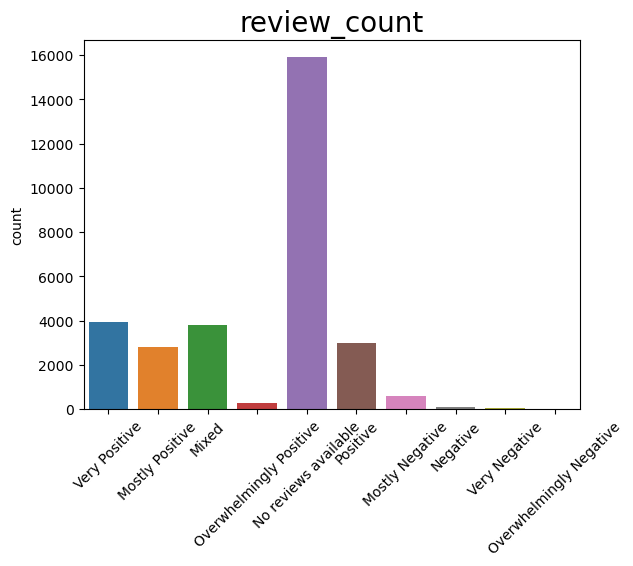

In [129]:
sns.countplot(data_merged['all_reviews'])
title = 'review_count'
plt.xticks(rotation=45)
plt.xlabel(None)          
plt.title(title,fontsize=20)
plt.show()

#### Saving the cleaned data as a new_csv 

In [130]:
data_merged.to_csv('data_selected.csv',index=False)

#### I want to keep the rest of the columns as they are right now